# NBA Salary Predictor

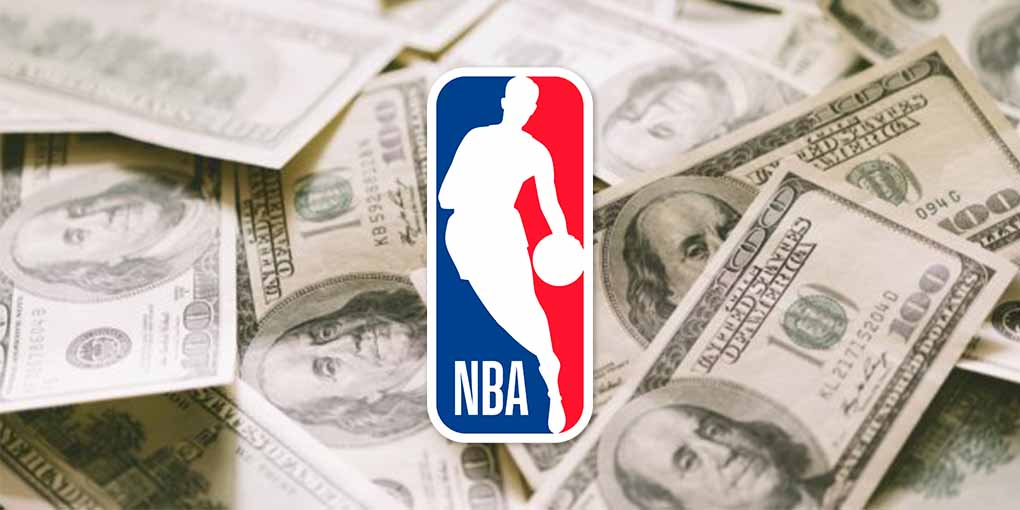

## 1) Load in Libraries

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

## 2) Load in datasets

In [206]:
# import player stats
stats21 = pd.read_csv("NBA Player Stats_2020-2021.csv", encoding='utf-8')
stats21.drop_duplicates(subset="Player", keep= "first", inplace=True) # only keeps total for players on multiple teams

stats21.drop(columns = ['Rk', 'Player-additional'], inplace=True)
stats21.rename(columns={'Player': 'Name'}, inplace=True) # to be consistent with salary data



stats22 = pd.read_csv("NBA Player Stats_2021-2022.csv", encoding='utf-8')
stats22.drop_duplicates(subset="Player", keep= "first", inplace=True) # only keeps total for players on multiple teams

stats22.drop(columns = ['Rk', 'Player-additional'], inplace=True)
stats22.rename(columns={'Player': 'Name'}, inplace=True) # to be consistent with salary data



stats23 = pd.read_csv("NBA Player Stats_2022-2023.csv", encoding='utf-8')
stats23.drop_duplicates(subset="Player", keep= "first", inplace=True) # only keeps total for players on multiple teams

stats23.drop(columns = ['Rk', 'Player-additional'], inplace=True)
stats23.rename(columns={'Player': 'Name'}, inplace=True) # to be consistent with salary data


# import salary data
salary21 = pd.read_csv('NBA Salary_2020-2021.csv')
salary22 = pd.read_csv('NBA Salary_2021-2022.csv')
salary23 = pd.read_csv('NBA Salary_2022-2023.csv')

C:\Users\aadamian\AppData\Local\Temp\ipykernel_3836\979371795.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary21['Salary_2020-2021'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


ValueError: could not convert string to float: '$43,006,362'

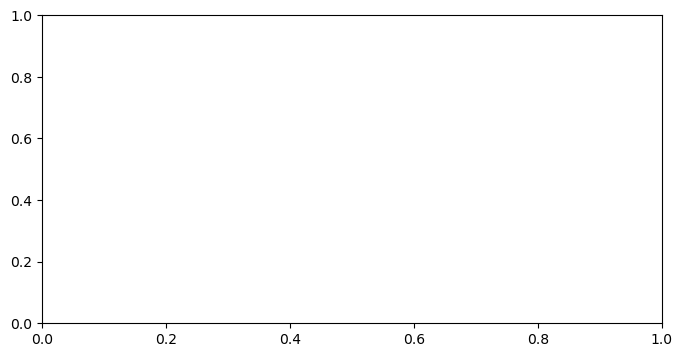

In [207]:
plt.figure(figsize=[8,4])
sns.distplot(salary21['Salary_2020-2021'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.show()

## 3) Clean Data

### Special Characters and Suffixes
       Doncic -> Doncic
       Bagley III -> Bagley
       T.J. -> TJ

In [ ]:
# ensure that there are no names with accents or special characters
stats21['Name'] = stats21['Name'].apply(unidecode)
stats22['Name'] = stats22['Name'].apply(unidecode)
stats23['Name'] = stats23['Name'].apply(unidecode)

# remove '.' from names; T.J. -> TJ. Jae'Sean and Karl-Anthony are OK
stats21[['First Name','Last Name','suffix']] = stats21['Name'].str.split(' ', expand=True)
stats21['First Name'] = stats21['First Name'].str.replace('.','')

stats22[['First Name','Last Name','suffix']] = stats22['Name'].str.split(' ', expand=True)
stats22['First Name'] = stats22['First Name'].str.replace('.','')

stats23[['First Name','Last Name','suffix']] = stats23['Name'].str.split(' ', expand=True)
stats23['First Name'] = stats23['First Name'].str.replace('.','')

# remove suffixes on names like Bagley III, Trent Jr
stats21["Name"] = stats21['First Name'] + " " + stats21["Last Name"]
stats21.drop(columns = ['First Name','Last Name','suffix'], inplace=True)

stats22["Name"] = stats22['First Name'] + " " + stats22["Last Name"]
stats22.drop(columns = ['First Name','Last Name','suffix'], inplace=True)

stats23["Name"] = stats23['First Name'] + " " + stats23["Last Name"]
stats23.drop(columns = ['First Name','Last Name','suffix'], inplace=True)


#stats21=stats21.convert_dtypes() #converts to string
#stats21['Name'] = stats21['Name'].astype('string') # converts Name column to string as it was only an object
#salary21=salary21.convert_dtypes() #converts to string

In [208]:
salary21[['First Name','Last Name','suffix']] = salary21['Name'].str.split(' ', expand=True)
salary21['First Name'] = salary21['First Name'].str.replace('.','')

# remove suffixes on names like Bagley III, Trent Jr
salary21['Name'] = salary21['First Name'] + " " + salary21['Last Name']
salary21.drop(columns = ['First Name','Last Name','suffix'], inplace=True)

salary21.drop(columns = ['#'], inplace=True)



salary22[['First Name','Last Name','suffix']] = salary22['Name'].str.split(' ', expand=True)
salary22['First Name'] = salary22['First Name'].str.replace('.','')

# remove suffixes on names like Bagley III, Trent Jr
salary22['Name'] = salary22['First Name'] + " " + salary22['Last Name']
salary22.drop(columns = ['First Name','Last Name','suffix'], inplace=True)

salary22.drop(columns = ['#'], inplace=True)



salary23[['First Name','Last Name','suffix']] = salary23['Name'].str.split(' ', expand=True)
salary23['First Name'] = salary23['First Name'].str.replace('.','')

# remove suffixes on names like Bagley III, Trent Jr
salary23['Name'] = salary23['First Name'] + " " + salary23['Last Name']
salary23.drop(columns = ['First Name','Last Name','suffix'], inplace=True)

salary23.drop(columns = ['#'], inplace=True)

C:\Users\aadamian\AppData\Local\Temp\ipykernel_3836\1501243520.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary21['First Name'] = salary21['First Name'].str.replace('.','')
C:\Users\aadamian\AppData\Local\Temp\ipykernel_3836\1501243520.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary22['First Name'] = salary22['First Name'].str.replace('.','')
C:\Users\aadamian\AppData\Local\Temp\ipykernel_3836\1501243520.py:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary23['First Name'] = salary23['First Na

In [209]:
salary21[['Salary_2020-2021','SalaryAdj_2020-2021']] = salary21[['Salary_2020-2021','SalaryAdj_2020-2021']].replace('[\$,]', '', regex=True).astype(float)
# alt: salary21[salary21.columns[1:]] = salary21[salary21.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
salary22[['Salary_2021-2023','SalaryAdj_2021-2023']] = salary22[['Salary_2021-2023','SalaryAdj_2021-2023']].replace('[\$,]', '', regex=True).astype(float)
salary23[['Salary_22-23','SalaryAdj_22-23']] = salary23[['Salary_22-23','SalaryAdj_22-23']].replace('[\$,]', '', regex=True).astype(float)

Separate quantitative data for later

In [210]:
#honestly - not really used rn
stats21vals = stats21.iloc[:,4:]
stats21vals_simple = stats21vals[["FG%", "3P%", "2P%", "eFG%", "FT%", "TRB", "AST", "STL", "BLK", "TOV", "PTS"]]
stats21vals_basic = stats21vals_simple [["FG%", "FT%", "TRB", "AST", "STL", "BLK", "TOV", "PTS"]] # add'l distinction

### Check how many unique players there are and if each row is a unique name

In [211]:
stats22["Name"].nunique()
stats22.shape[0] #540 players, all unique

salary22["Name"].nunique()
salary22.shape[0] # 578 players, all unique - delta of 38

653

### Merge data tables and see who are the outliers and why

In [212]:
combined_full = pd.merge(salary21, stats21, on='Name', how='outer') # only 521 players are the same in both, 597 total
combined_full[combined_full['Salary_2020-2021'].isna()] #19
combined_full[combined_full['Pos'].isna()] # 57, delta of 38

,Name,Salary_2020-2021,SalaryAdj_2020-2021,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
8,Klay Thompson,35361360.0,40644227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Nikola Jokic,29542010.0,33955486.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Kristaps Porzingis,29467800.0,33870189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Otto Porter,28489239.0,32745434.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Nikola Vucevic,26000000.0,29884312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,Jerian Grant,50000.0,57469.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,Cam Reynolds,33299.0,38273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,Andrew White,25000.0,28734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575,Tyler Hall,25000.0,28734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
len(df.columns)

63

In [250]:
df

,Name,Salary_2020-2021,SalaryAdj_2020-2021,Pos_x,Age_x,Tm_x,G_x,GS_x,MP_x,FG_x,...,FT%_y,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,PTS_y
0,Stephen Curry,43006362.0,49431367.0,PG,32,GSW,63,63,34.2,10.4,...,0.923,0.5,4.7,5.2,6.3,1.3,0.4,3.2,2.0,25.5
1,Russell Westbrook,41358814.0,47537680.0,PG,32,WAS,65,65,36.4,8.4,...,0.667,1.4,6.0,7.4,7.1,1.0,0.3,3.8,3.0,18.5
2,Chris Paul,41358814.0,47537680.0,PG,35,PHO,70,70,31.4,6.3,...,0.837,0.3,4.0,4.4,10.8,1.9,0.3,2.4,2.1,14.7
3,James Harden,41254920.0,47418265.0,PG,31,TOT,44,43,36.6,7.8,...,0.877,0.8,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22.0
4,Kevin Durant,40108950.0,46101091.0,PF,32,BRK,35,32,33.1,9.3,...,0.910,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Didi Louzada,123056.0,141440.0,SF,21,NOP,3,0,18.7,1.0,...,1.000,0.6,1.3,1.9,0.6,0.2,0.2,0.6,1.4,3.9
388,Dakota Mathias,86132.0,98999.0,SG,25,PHI,8,2,15.4,2.4,...,NaN,0.0,0.3,0.3,0.2,0.2,0.0,0.0,0.2,1.0
389,Malik Fitts,61528.0,70720.0,PF,23,LAC,3,0,3.7,0.3,...,NaN,0.1,1.0,1.1,0.3,0.0,0.0,0.1,0.3,1.4
390,Louis King,49222.0,56575.0,SF,21,SAC,6,1,14.2,2.8,...,0.700,0.0,1.2,1.2,0.9,0.2,0.1,0.0,1.4,4.5


In [248]:
from functools import reduce

df21 = pd.merge(salary21, stats21, on='Name', how='inner')
df22 = pd.merge(salary22, stats22, on='Name', how='inner')
df23 = pd.merge(salary23, stats23, on='Name', how='inner')
df = pd.merge(df21, df22, on='Name', how='inner')


#df = reduce(lambda  left,right: pd.merge(left,right,on=['Name'],
#                                            how='outer'), [df21,df22,df23])

Only 19 players were not merged due to some of the below issues, the rest were due to no stats (per #4)


Known issues:
1) Spelling; Schroder -> Schroeder
2) Nicknames; Ish -> Ishmael, Svi -> Sviatoslav, Juan -> Juancho, JJ -> Jose Juan, Kanter -> Freedom
3) Add'l characters; Devonte -> Devonte'


Why stats table didn't have player info:

4) Players not playing entire season; Klay missed season due to injury, Caleb Homesley - no minutes

### Fill in NA values for model

C:\Users\aadamian\AppData\Local\Temp\ipykernel_3836\409704792.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary_2020-2021'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=50)


<Axes: xlabel='Salary_2020-2021', ylabel='Density'>

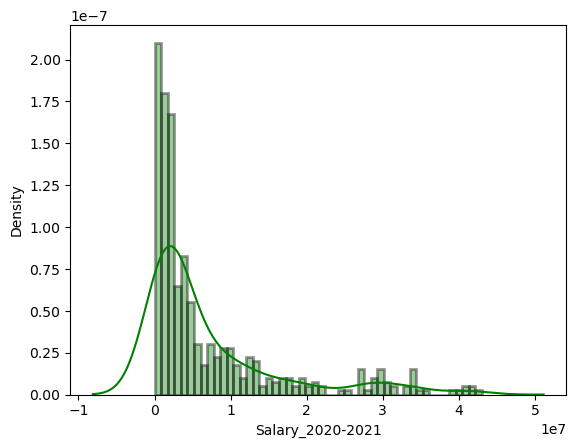

In [214]:
sns.distplot(df['Salary_2020-2021'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=50)

In [215]:
df[['FG%', '3P%', '2P%', 'eFG%', 'FT%']] = df[['FG%', '3P%', '2P%', 'eFG%', 'FT%']].fillna(0)
df.isna().sum()

Name                     0
Salary_2020-2021       212
SalaryAdj_2020-2021    212
Pos_x                  212
Age_x                  212
                      ... 
STL                    212
BLK                    212
TOV                    212
PF                     212
PTS                    212
Length: 95, dtype: int64

## 4) Create ML Model

## Models

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [217]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5  # You can choose the number of folds (e.g., 5, 10)
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [218]:
#move team column to the left to make next line of code simpler
col = df.pop('Tm')
df.insert(3, col.name, col)

*ADJUST FEATURES HERE*

In [219]:
features = df.columns[5:] # removing position as it's qualitative
#features = features.drop(['Age','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TOV','G', 'GS', 'MP', 'PF'])
target = df.columns[1] # for now, let's just focus on the one season. Use adjusted salary when doing multiple years

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

C:\Users\aadamian\AppData\Local\Temp\ipykernel_3836\2680517125.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


<Axes: xlabel='Salary_2020-2021', ylabel='Density'>

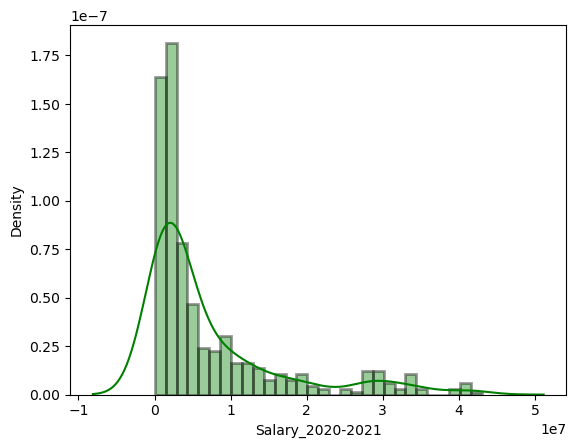

In [220]:
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)

In [224]:
features

Index(['Age_x', 'Tm_x', 'G_x', 'GS_x', 'MP_x', 'FG_x', 'FGA_x', 'FG%_x',
       '3P_x', '3PA_x', '3P%_x', '2P_x', '2PA_x', '2P%_x', 'eFG%_x', 'FT_x',
       'FTA_x', 'FT%_x', 'ORB_x', 'DRB_x', 'TRB_x', 'AST_x', 'STL_x', 'BLK_x',
       'TOV_x', 'PF_x', 'PTS_x', 'Salary_2021-2023', 'SalaryAdj_2021-2023',
       'Unnamed: 4_x', 'Unnamed: 5_x', 'Pos_y', 'Age_y', 'Tm_y', 'G_y', 'GS_y',
       'MP_y', 'FG_y', 'FGA_y', 'FG%_y', '3P_y', '3PA_y', '3P%_y', '2P_y',
       '2PA_y', '2P%_y', 'eFG%_y', 'FT_y', 'FTA_y', 'FT%_y', 'ORB_y', 'DRB_y',
       'TRB_y', 'AST_y', 'STL_y', 'BLK_y', 'TOV_y', 'PF_y', 'PTS_y',
       'Salary_22-23', 'SalaryAdj_22-23', 'Unnamed: 4_y', 'Unnamed: 5_y',
       'Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [222]:
target

'Salary_2020-2021'

In [223]:
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (473, 90)
The dimension of X_test is (204, 90)


ValueError: could not convert string to float: 'SG'

In [ ]:
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model:\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

cv_results = cross_val_score(ridgeReg, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_scores = -cv_results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

In [175]:
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

predictions = lasso.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared value: {r2}")

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

Mean Squared Error: 29250903647163.223
R-Squared value: 0.5753790112762215
The train score for ls model is 0.6985340353303982
The test score for ls model is 0.5753790112762215


C:\Users\aadamian\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.860e+15, tolerance: 3.237e+12
  model = cd_fast.enet_coordinate_descent(


In [176]:
print("\nLinear Regression............................................\n")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared value: {r2}")

train_score_lr = lr.score(X_train, y_train)
test_score_lr =lr.score(X_test,y_test)
print("The train score for ls model is {}".format(train_score_lr))
print("The test score for ls model is {}".format(test_score_lr))


Linear Regression............................................

Mean Squared Error: 29822671037807.746
R-Squared value: 0.567078945142742
The train score for ls model is 0.7032127017710055
The test score for ls model is 0.567078945142742


In [177]:
print("\nRandom Forest............................................\n")

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

mse = mean_squared_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared value: {r2}")

train_score_rf = rf_model.score(X_train, y_train)
test_score_rf =rf_model.score(X_test,y_test)
print("The train score for ls model is {}".format(train_score_rf))
print("The test score for ls model is {}".format(test_score_rf))


Random Forest............................................

Mean Squared Error: 26046133195758.156
R-Squared value: 0.6219010884784533
The train score for ls model is 0.9603425875388145
The test score for ls model is 0.6219010884784533


In [178]:
#Install XGBoost
import subprocess

# Install xgboost using pip
subprocess.check_call(['python', '-m', 'pip', 'install', 'xgboost'])

0

In [179]:
print("\nXGBoost............................................\n")
import xgboost as xgb

train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgb.DMatrix(data=X_test)

# Set hyperparameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10
}

# Train the XGBoost model
xg_reg = xgb.train(params=params, dtrain=train_dmatrix, num_boost_round=10)

# Predict salaries for the test set
xgb_predictions = xg_reg.predict(test_dmatrix)

# Evaluate the model using Mean Squared Error
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost Mean Squared Error: {xgb_mse}")
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"XGBoost R-Squared: {xgb_r2}")


XGBoost............................................

XGBoost Mean Squared Error: 35695617817922.6
XGBoost R-Squared: 0.4818242638318503
